<a href="https://colab.research.google.com/github/Saketkr06/LinearRegression-assumptions/blob/main/Copy_of_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np



reading file

In [ ]:
car_dataset=pd.read_csv('/content/car data.csv')

loading table

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


No of rows and columns

No of rows and columns

In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


checking no of missing values

In [ ]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

checking the distribution of categorical data

In [ ]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#Encoding caterogical data into int/float

In [ ]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


splitting data and target

In [ ]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [ ]:
print(X)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


splitting training and test data set

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training(Linear regression)

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model evaluation

In [ ]:
#prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [ ]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R-Squared Error :",error_score)

R-Squared Error : 0.8799451660493711


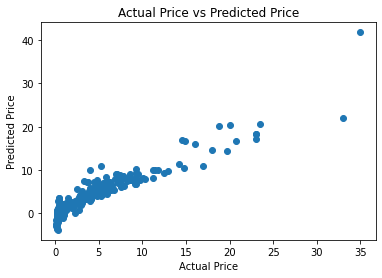

In [ ]:
#Visualize actual prices and predicted price
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
#Prediction on test data
test_data_prediction=lin_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :",error_score)

R squared error : 0.8365766715027051


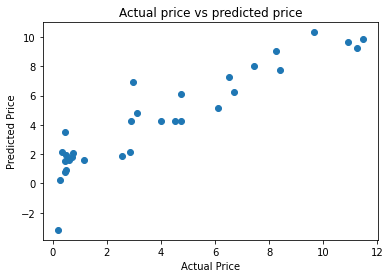

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price")
plt.show()

Checking Assumptions

In [ ]:
car_dataset["Present_Price"].unique()

array([ 5.59 ,  9.54 ,  9.85 ,  4.15 ,  6.87 ,  9.83 ,  8.12 ,  8.61 ,
        8.89 ,  8.92 ,  3.6  , 10.38 ,  9.94 ,  7.71 ,  7.21 , 10.79 ,
        5.09 ,  7.98 ,  3.95 ,  5.71 ,  8.01 ,  3.46 ,  4.41 ,  4.99 ,
        5.87 ,  6.49 ,  5.98 ,  4.89 ,  7.49 ,  9.95 ,  8.06 ,  7.74 ,
        7.2  ,  2.28 ,  3.76 ,  7.87 ,  3.98 ,  7.15 ,  2.69 , 12.04 ,
        9.29 , 30.61 , 19.77 , 10.21 , 15.04 ,  7.27 , 18.54 ,  6.8  ,
       35.96 , 18.61 ,  7.7  , 36.23 ,  6.95 , 23.15 , 20.45 , 13.74 ,
       20.91 ,  6.76 , 12.48 ,  8.93 , 14.68 , 12.35 , 22.83 , 14.89 ,
        7.85 , 25.39 , 13.46 , 23.73 , 92.6  ,  6.05 , 16.09 , 13.7  ,
       22.78 , 18.64 ,  1.9  ,  1.82 ,  1.78 ,  1.6  ,  1.47 ,  2.37 ,
        3.45 ,  1.5  ,  2.4  ,  1.4  ,  1.26 ,  1.17 ,  1.75 ,  0.95 ,
        0.8  ,  0.87 ,  0.84 ,  0.82 ,  0.81 ,  0.74 ,  1.2  ,  0.787,
        0.99 ,  0.94 ,  0.826,  0.55 ,  0.88 ,  0.51 ,  0.52 ,  0.54 ,
        0.73 ,  0.83 ,  0.64 ,  0.72 ,  1.05 ,  0.57 ,  0.48 ,  0.58 ,
      

In [ ]:
print(test_data_prediction)

[10.32892855  0.77165673  4.26482324  4.78985002  9.88701568  4.24823193
  6.92536953  7.29321065  0.21950514  5.18527582  6.23823964  6.07761019
  2.1716932   7.77611973  1.89987958  1.79635895  2.10001123  1.91953211
  9.24977006  4.25291486  1.569912    9.04949049  1.52561157  9.65418587
  0.89631315  7.99187626  1.59929505 -3.17680912  4.24653988  2.1257015
  3.49654935]


In [ ]:
print(training_data_prediction)

[ 3.73088505e+00  5.60702081e+00  7.79779356e+00 -1.88374756e+00
  6.71614572e+00  8.14343296e+00  5.84067525e+00  6.17919527e+00
  6.15863751e+00  1.59459051e+01  2.15385926e+00  1.11618544e+00
 -4.05463414e-01  6.69051516e+00  6.81961414e+00  1.02957394e+00
  6.74306974e+00  1.43864300e+01  3.00001893e+00  7.95149024e+00
 -8.38569413e-01  9.02067892e+00  1.21210550e+00  2.20040027e+00
 -8.23744275e-01  7.52651502e-01  1.00142469e+01 -4.08950275e-01
 -2.40418357e+00  9.99845989e+00  6.81867179e+00  1.09249928e+00
  4.36158792e+00  9.20660480e-02  3.48993776e+00  2.78147834e+00
  1.50401026e+00  4.65736158e-01  1.68679810e+00  1.18722506e+00
  4.32936153e+00  6.09932798e+00  9.51639926e-01  7.52875828e-01
  6.05967594e+00  3.49453005e+00  2.40969246e+00  7.52230513e+00
  4.63113915e+00  4.44239322e+00  4.22460259e+00  2.71077171e+00
  4.46881874e+00  1.76156730e+00  2.86100050e-01  3.95181249e+00
  1.36371845e+00  4.63046605e+00  1.44343122e+00  7.27550233e+00
  7.26488044e+00  6.54659